In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/soham/Desktop/Python_Data_Science'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns = ['Films','Genre','CriticRating','AudienceRating',\
                 'BudgetMillions','Year']

In [6]:
movies.head()

,Films,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films             559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies.Films=movies.Films.astype('category')

In [12]:
movies.head()

,Films,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films             559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 27.4+ KB


In [15]:
movies.Genre=movies.Genre.astype('category')
movies.Year=movies.Year.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films             559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [18]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [19]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
#JointPlots

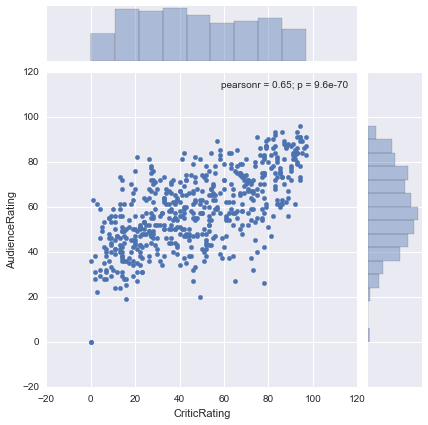

In [22]:
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')

In [23]:
## Histograms

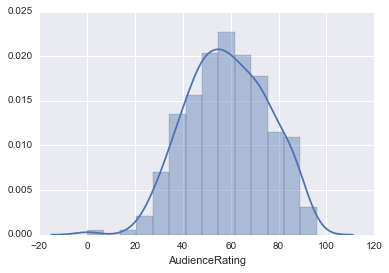

In [26]:
m1 = sns.distplot(movies.AudienceRating,bins=14)
#<<< Chart1

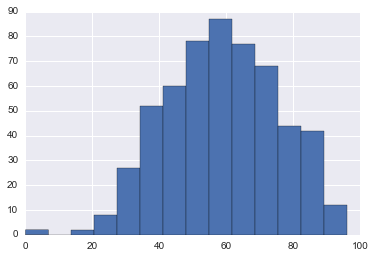

In [27]:
n1 = plt.hist(movies.AudienceRating,bins=14)


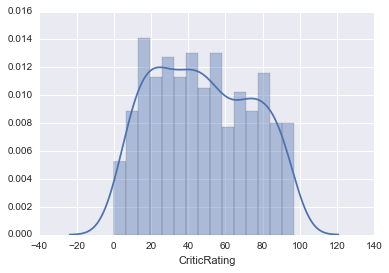

In [28]:
m2 = sns.distplot(movies.CriticRating,bins=15)
#<<< Chart2

In [29]:
## Stacked Histograms

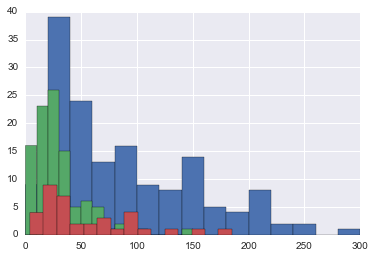

In [41]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions,bins=15)
plt.show()

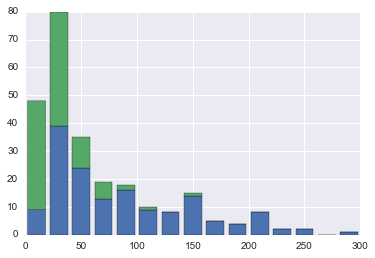

In [43]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
 movies[movies.Genre == 'Drama'].BudgetMillions],bins=15,stacked=True)
plt.show()

In [52]:
list1 = list()
mylables=list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylables.append(gen)

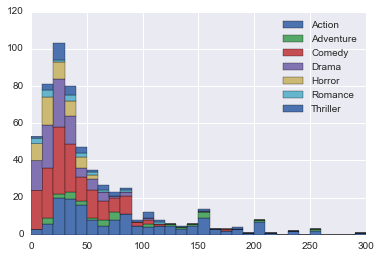

In [54]:
h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylables)
plt.legend()
plt.show()

In [55]:
# KDE Plot


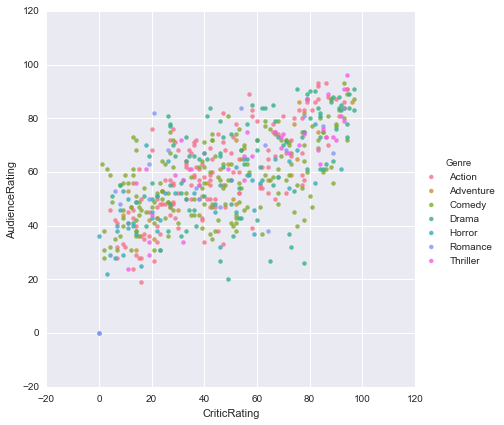

In [57]:
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',\
                 fit_reg=False,hue='Genre',\
                 size=6,aspect=1)

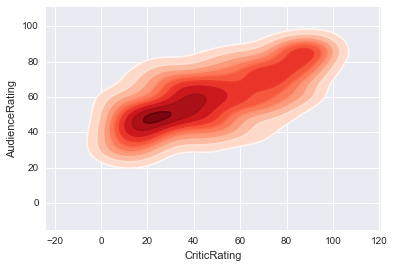

In [62]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,\
                shade_lowest=False,cmap='Reds')

k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRating,\
                cmap='Reds')

In [63]:
# Working with subplots

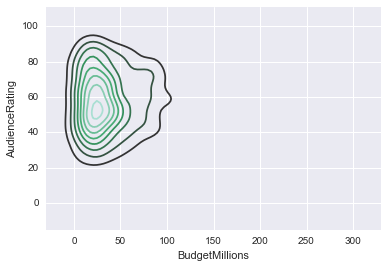

In [64]:
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

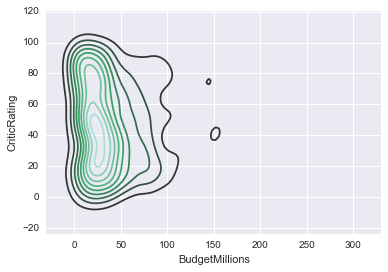

In [65]:
k3 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

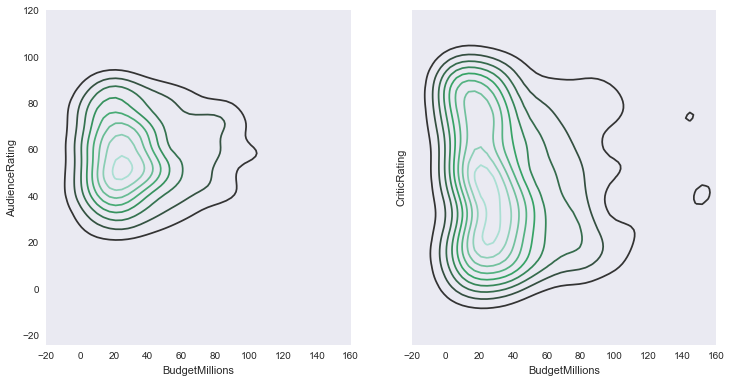

In [73]:

f, axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k3 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k2.set(xlim=(-20,160))

In [74]:
# Violin plots

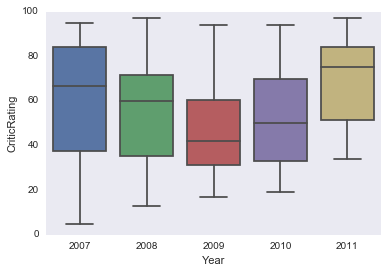

In [79]:
#w = sns.boxplot(data=movies,x='Genre',y='CriticRating')
w = sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

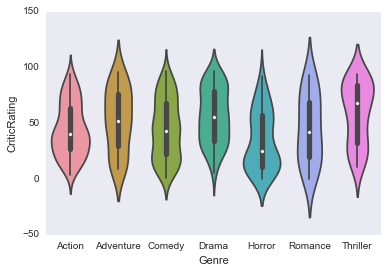

In [77]:
z = sns.violinplot(data=movies,x='Genre',y='CriticRating')

In [80]:
# Creating Facet Grids

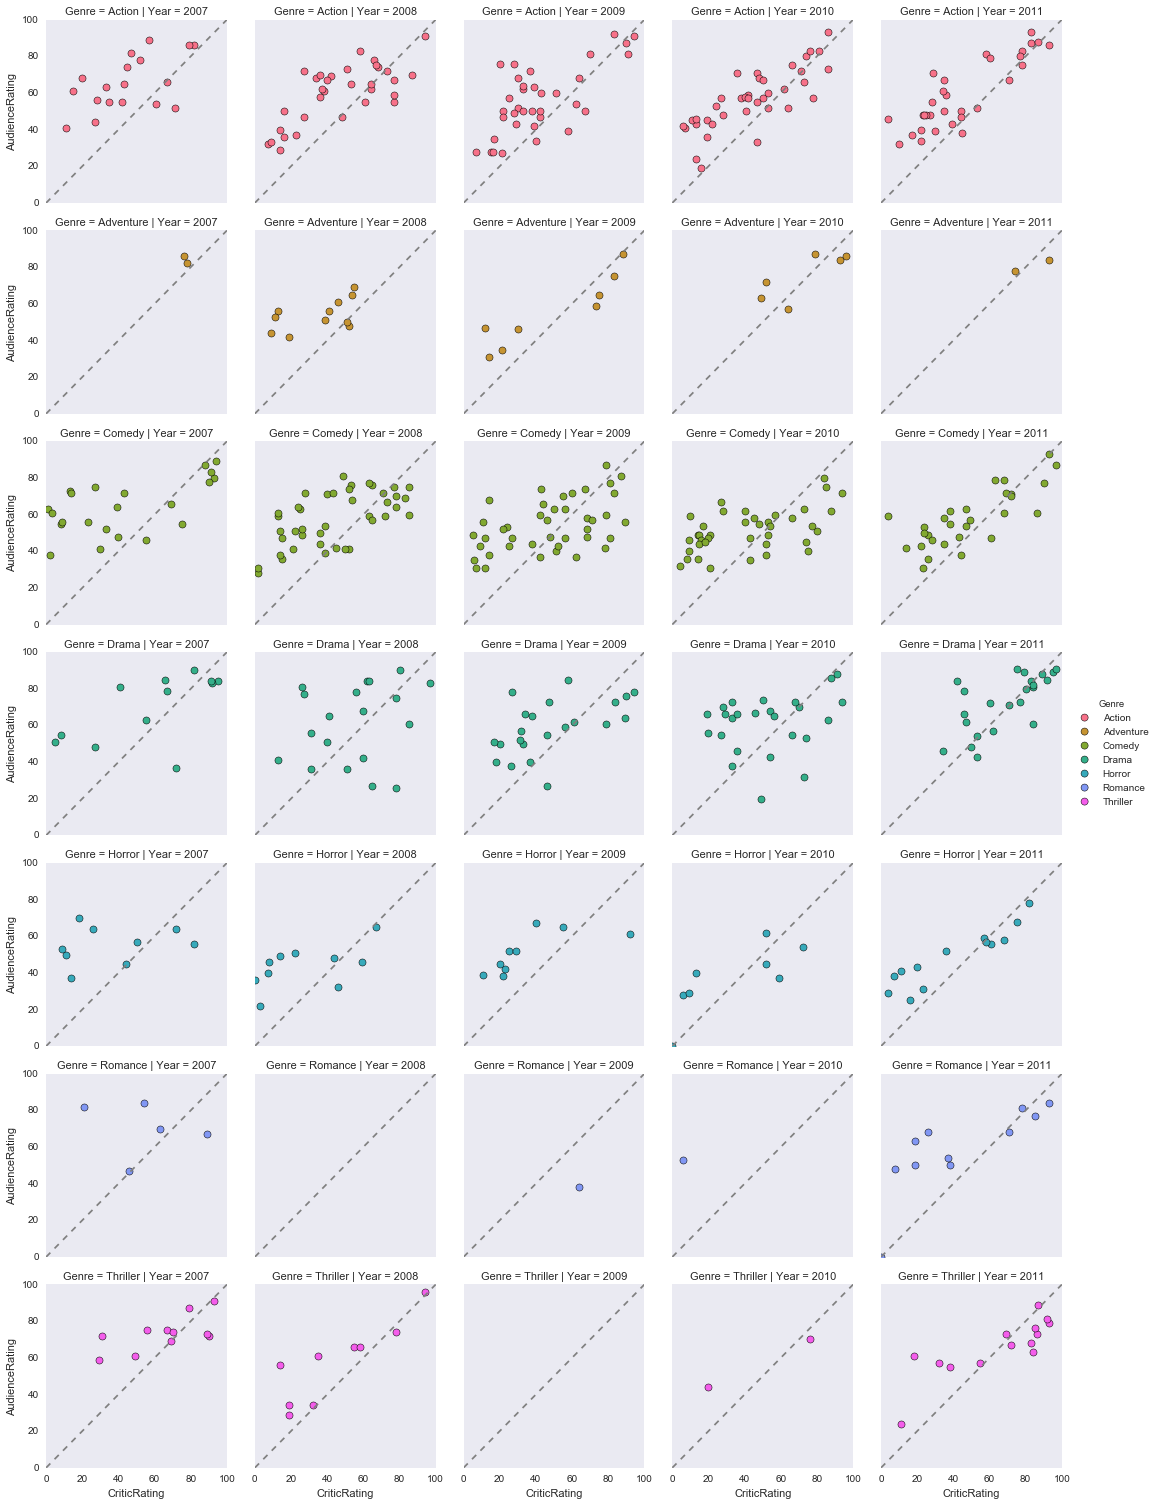

In [93]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="Grey",ls='--')
g.add_legend()

#<< Chart 5

---


# Building Dashboards

In [95]:
## building Dashboards

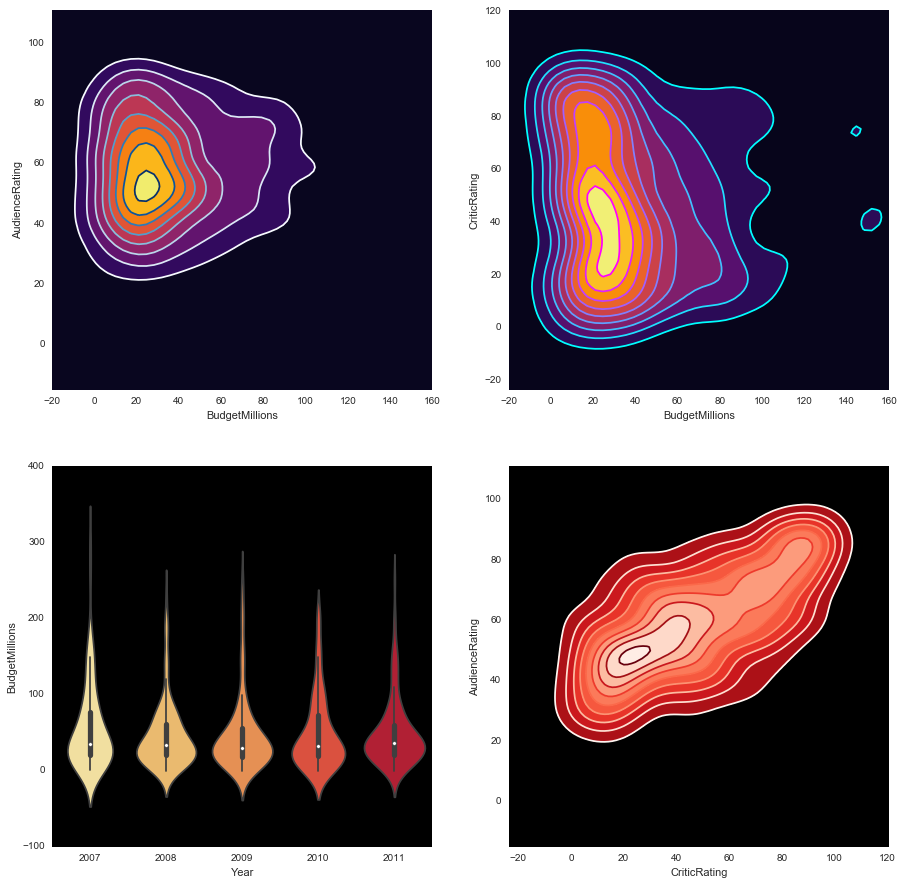

In [106]:
sns.set_style("dark",{"axes.facecolor":"black"})
f, axes = plt.subplots(2,2,figsize=(15,15))

#Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,\
                shade=True,shade_lowest=True,ax=axes[0,0],cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,\
                 cmap='Blues',ax=axes[0,0])
#Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,\
                ax=axes[0,1],shade=True,shade_lowest=True,cmap='inferno')
k2b = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,\
                 cmap='cool',ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=movies,\
                  x='Year',y='BudgetMillions',ax=axes[1,0],\
                  palette="YlOrRd")

#Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,\
                shade=True,shade_lowest=False,cmap='Reds_r',\
                ax=axes[1,1])
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,\
                cmap='Reds',ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

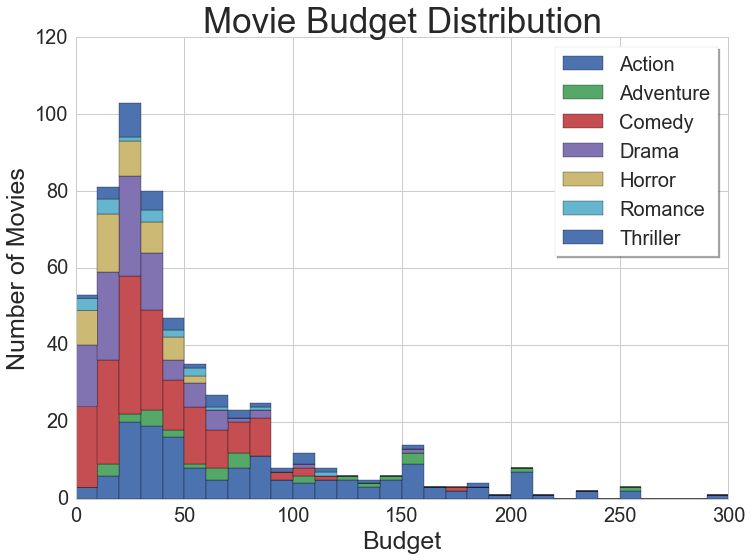

In [115]:
sns.set_style("whitegrid")
list1 = list()
mylables=list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylables.append(gen)

fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylables)
plt.title('Movie Budget Distribution',fontsize=35)
plt.ylabel("Number of Movies",fontsize=25)
plt.xlabel("Budget",fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel
plt.legend(frameon=True,shadow=True,prop={'size':20})
plt.show()